# Lab Assignment 4 -- Data and Pandas
In this lab, you will complete a series of exercises related to the lecture material on data and Pandas using some real datasets. Each exercise will focus around a single dataset and contain multiple steps.

In [1]:
# We import the libraries you will need
import math
import pandas as pd

## Exercise 1 -- Unemployment Data
Below, we load in data on Unemployment in the United States at the State level.

In [2]:
# Do Not Edit
url = "https://datascience.quantecon.org/assets/data/state_unemployment.csv"
unemp = pd.read_csv(url, parse_dates=["Date"])

## Exercise 1a -- Displaying Data
Complete the following steps:
- In two cells below, display the top 7 rows  and the bottom 3 rows of `unemp`.
- In the third cell, change `unemp` so its column names are strictly lowercase
- Display the resulting DataFrame by calling `unemp` at the bottomg of the third cell.

From a "tidy" perspective, what is an observation in this data? Explain why. Answer in the Markdown cell below.

In [21]:
## Exercise 1a -- Top 7
unemp.head(8) #7 as in 0-7 or literal number of rows (0-6 = 7?)? Haha.

,Date,state,LaborForce,UnemploymentRate
0,2000-01-01,Alabama,2142945.0,4.7
1,2000-01-01,Alaska,319059.0,6.3
2,2000-01-01,Arizona,2499980.0,4.1
3,2000-01-01,Arkansas,1264619.0,4.4
4,2000-01-01,California,16680246.0,5.0
5,2000-01-01,Colorado,2354671.0,2.8
6,2000-01-01,Connecticut,1768421.0,2.8
7,2000-01-01,Delaware,405052.0,3.5


In [4]:
## Exercise 1a -- Bottom 3
unemp.tail(3)

,Date,state,LaborForce,UnemploymentRate
10797,2017-12-01,West Virginia,781852.0,5.4
10798,2017-12-01,Wisconsin,3158257.0,3.2
10799,2017-12-01,Wyoming,292305.0,4.1


In [3]:
# Exercise 1a -- Rename Columns
unemp.columns = [i.lower() for i in unemp.columns]
unemp

,date,state,laborforce,unemploymentrate
0,2000-01-01,Alabama,2142945.0,4.7
1,2000-01-01,Alaska,319059.0,6.3
2,2000-01-01,Arizona,2499980.0,4.1
3,2000-01-01,Arkansas,1264619.0,4.4
4,2000-01-01,California,16680246.0,5.0
...,...,...,...,...
10795,2017-12-01,Virginia,4318483.0,3.6
10796,2017-12-01,Washington,3754871.0,4.7
10797,2017-12-01,West Virginia,781852.0,5.4
10798,2017-12-01,Wisconsin,3158257.0,3.2


In [23]:
unemp.tail(280)

,Date,state,LaborForce,UnemploymentRate
10520,2017-07-01,Massachusetts,3661353.0,3.7
10521,2017-07-01,Michigan,4880845.0,4.5
10522,2017-07-01,Minnesota,3066447.0,3.4
10523,2017-07-01,Mississippi,1279873.0,5.1
10524,2017-07-01,Missouri,3051495.0,3.6
...,...,...,...,...
10795,2017-12-01,Virginia,4318483.0,3.6
10796,2017-12-01,Washington,3754871.0,4.7
10797,2017-12-01,West Virginia,781852.0,5.4
10798,2017-12-01,Wisconsin,3158257.0,3.2


### Response to Exercise 1a
From a "tidy" perspective, the dataset contains each key, 'state', respective with its 'date' to correspond to its 'labor force' and 'unemployment rate', clear and matched per row. I.e., if given a state and date, we can source the specific data. And,


*   the data is in chronological order and timestamp format; dates begin from 2000-01-01.
*   As well, states are listed in alphabetical order by which is slightly weird in that each month beginning or every month is so, by testing head(280) and tail/head.(500).




## Exercise 1b -- Creating Variables & Index Setting
Complete the following steps:
- Create a column in `unemp` called "year" that is equal to the year of the date.
- Change the index of `unemp` so that the index (or indices) reflect the observational units.
- Display the indices.  

In the Markdown cell below, address the following prompts:
1. How many indices are there?
2. Why are there this many indices? Write an equation that explains it.
3. Is one of your indices a `DateTimeIndex` object?

In [4]:
# Exercise 1b Code
unemp.insert(4, "year", unemp["date"].dt.year)

In [5]:
unemp.set_index(["state",'date'], inplace=True)
unemp

,,laborforce,unemploymentrate,year
state,date,,,
Alabama,2000-01-01,2142945.0,4.7,2000
Alaska,2000-01-01,319059.0,6.3,2000
Arizona,2000-01-01,2499980.0,4.1,2000
Arkansas,2000-01-01,1264619.0,4.4,2000
California,2000-01-01,16680246.0,5.0,2000
...,...,...,...,...
Virginia,2017-12-01,4318483.0,3.6,2017
Washington,2017-12-01,3754871.0,4.7,2017
West Virginia,2017-12-01,781852.0,5.4,2017


In [87]:
unemp['state']

year
2000          Alabama
2000           Alaska
2000          Arizona
2000         Arkansas
2000       California
            ...      
2017         Virginia
2017       Washington
2017    West Virginia
2017        Wisconsin
2017          Wyoming
Name: state, Length: 10800, dtype: object

In [88]:
unemp.index

Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
       ...
       2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
      dtype='int32', name='year', length=10800)

### Response to Exercise 1b


*   There are 10800 indices/year entries.
*   2000-2017 = 17 years+1 since year 2000 begins also from Jan-01, each with 12 months but each only with Jan-01 entries, one per state. 18x12x50 = 10800.
*   No, as I took only the year and state as the index – however, the 'date' column are all in Datetime Index format – as I checked my answer afterward below with dtypes.

In [89]:
unemp.dtypes

date                datetime64[ns]
state                       object
laborforce                 float64
unemploymentrate           float64
dtype: object

In [90]:
type(unemp.index)

pandas.core.indexes.base.Index

### Exercise 1c -- Plotting Annual Averages
Complete the following steps:
1. Using `tiny_unemp`, find the year-state average of the unemployment rate and save it to `yearly_state_unemp`.
2. Reshape `yearly_state_unemp` by using `unstack()`. Ensure that your row indices are years and your column variables are states.  
3. Display `yearly_state_unemp` by making it the last line in the cell.
4. Note that the `unemploymentrate` level is not very useful because all of the numbers are unemployment rates. Let's remove it by using `.droplevel()` on `yearly_state_unemp`. Call this new DataFrame `clean_state_unemp` You may want to reference the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.droplevel.html) to see which argument you will need.
5. Use the `.plot()` method on `clean_state_unemp`.
6. In the next cell, use the `.plot()` method on `yearly_state_unemp`.

In the Markdown cell below **answer the following questions**:
1. What is the most salient real world phenomenon this is visible in the plot?
2. Compare the two plots. How did removing the `unemploymentrate` level change the plot?

**Hints**
- You can use `df.drop()` ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html))  to get rid of the `laborforce` column when creating `yearly_state_unemp`.

In [70]:
#unemp.loc[(unemp['state'] == "Colorado")|(unemp['state'] == "Colorado")]
#unemp.loc[(unemp['state'] == "Colorado")|(unemp['unemploymentrate'] < 5)]
#unemp.loc[unemp['state'].isin(["Colorado","California", "Alabama", "New York", "Florida"])]

In [6]:
# Do not edit this code
tiny_unemp = unemp.loc[["Colorado","California", "Alabama", "New York", "Florida"]]
tiny_unemp

laborforce  unemploymentrate  year
state    date                                          
Colorado 2000-01-01   2354671.0               2.8  2000
         2000-02-01   2356780.0               2.8  2000
         2000-03-01   2357991.0               2.7  2000
         2000-04-01   2358321.0               2.7  2000
         2000-05-01   2357978.0               2.7  2000
...                         ...               ...   ...
Florida  2017-08-01  10123142.0               4.0  2017
         2017-09-01  10132775.0               3.9  2017
         2017-10-01  10139339.0               3.9  2017
         2017-11-01  10139552.0               3.9  2017
         2017-12-01  10138193.0               3.9  2017

[1080 rows x 3 columns]

In [7]:
# Exercise 1c -- Steps 1-3
tiny_unemp1 = tiny_unemp.drop(['laborforce'], axis=1)
yearly_state_unemp = tiny_unemp1.groupby(['year','state']).mean()
yearly_state_unemp.unstack()
#yearly_state_unemp

unemploymentrate                                          
state          Alabama California  Colorado    Florida  New York
year                                                            
2000          4.575000   4.958333  2.758333   3.716667  4.525000
2001          5.100000   5.433333  3.816667   4.633333  4.833333
2002          5.900000   6.650000  5.525000   5.641667  6.141667
2003          6.025000   6.800000  5.950000   5.225000  6.391667
2004          5.700000   6.208333  5.475000   4.608333  5.808333
2005          4.500000   5.400000  5.025000   3.683333  5.000000
2006          4.066667   4.916667  4.308333   3.241667  4.558333
2007          3.975000   5.375000  3.725000   4.008333  4.550000
2008          5.716667   7.291667  4.850000   6.300000  5.458333
2009         10.991667  11.141667  7.300000  10.391667  8.316667
2010         10.541667  12.225000  8.725000  11.033333  8.591667
2011          9.616667  11.708333  8.358333   9.991667  8.300000
2012          7.983333  10.375000  7.891667   8.483333  8.516667
2013          7.216667   8.941667  6.850000   7.233333  7.708333
2014          6.766667   7.500000  5.000000   6.266667  6.333333
2015          6.091667   6.200000  3.875000   5.441667  5.258333
2016          5.858333   5.483333  3.275000   4.825000  4.850000
2017          4.408333   4.775000  2.808333   4.150000  4.700000

In [8]:
# Exercise 1c -- Steps 4 & 5
clean_state_unemp = yearly_state_unemp.droplevel('unemploymentrate',axis=1)
clean_state_unemp #because groupby is used, drop is not neeeded.

KeyError: 'Requested level (unemploymentrate) does not match index name (None)'

<Axes: xlabel='year,state'>

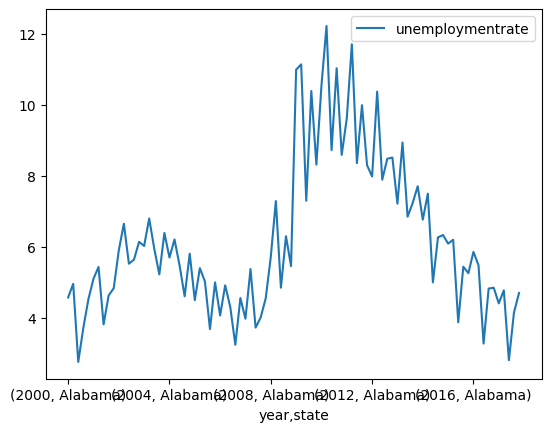

In [9]:
# Exercise 1c -- Step 6
yearly_state_unemp.plot()

<Axes: xlabel='state,date'>

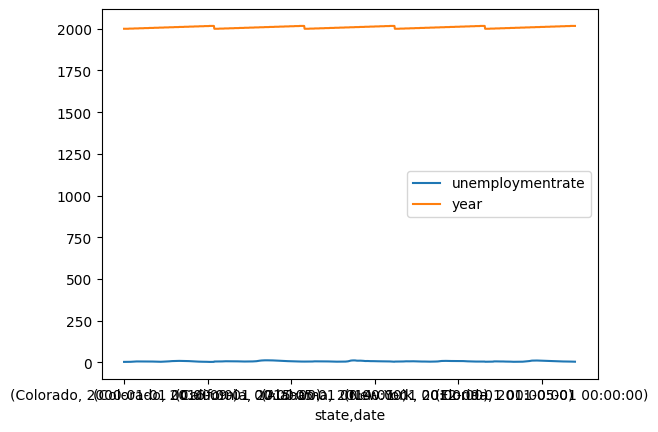

In [135]:
tiny_unemp1.plot()

### Response to Exercise 1c
What is the most salient real world phenomenon this is visible in the plot?

1.   From the plot, the most curcial real world phenomenon reflected is that 1) economic cycles are roughly 5.5 years long, by which the large trend of yearly_state_unemp (cleaned) goes up and down. More importantly are the smaller ups and downs, heightened post-economic crisis 2008 and into the years of 2010. Post dot-com bubble 2000s, unemployment spiked yet not as high as in the housing crisis after. As seen, unemployment are contrastingly lower in the 1950s in the height of the Internet business. Next in the tiny_unemp plot, you see a negative correlation of the labor force movement in opposition to the unemployment rate, levelling in steady years and falling during crises.
2.   Without removing the unemployment rate level/grouping by the state and the year, tiny_unemp1 shows an awkward resemblance of a NON-time-series plot that takes year and unemployment rates as separate subjects, making it hard to interpret and numbers awkward in logic.

## Exercise 1d -- Using Lags to Plot Difference
Instead of plotting the unemployment rate average over time, we will plot the annual difference between unemployment rates over time for each state. To do this, complete the following steps:
1. Create a DataFrame called `shifted_unemp` and assign it to `clean_state_unemp` shifted by 1.
2. Create a DataFrame called `change_unemp` and assign it to the the difference between `clean_state_unemp` and `shifted_unemp` divided by `shifted_unemp`.
3. Call `.plot()` on `change_unemp`.

Answer the following questions in the markdown cell below.
1. Why is the year 2000 no longer being plotted? Look at the `change_unemp` DataFrame if you are unsure.
2. Which state saw the largest annual increase in unemployment during this period?

In [151]:
change_unemp

unemploymentrate
year state                       
2000 Alabama                  NaN
     California          0.083789
     Colorado           -0.443697
     Florida             0.347432
     New York            0.217489
...                           ...
2017 Alabama            -0.091065
     California          0.083176
     Colorado           -0.411867
     Florida             0.477745
     New York            0.132530

[90 rows x 1 columns]

In [157]:
change_unemp.iloc[[0]]

,,unemploymentrate
year,state,
2000,Alabama,NaN


<Axes: xlabel='year,state'>

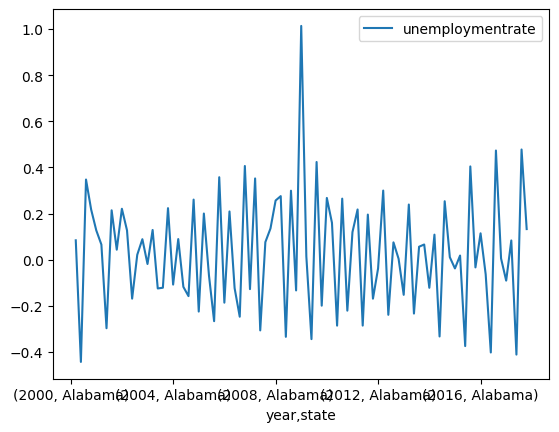

In [145]:
# Exercise 1d code
shifted_unemp = pd.DataFrame(yearly_state_unemp.shift(1))
change_unemp = pd.DataFrame((yearly_state_unemp - shifted_unemp)/shifted_unemp)
change_unemp.plot()

### Response to Exercise 1d


1.   The year 2000 is no longer being plotted because we have shifted the index values 1 over. As seen from change_unemp, the first of Alabama shows NaN in shifting, whereby fillna could be used if we want to fill with 0.
2.   During this period, Alabama saw the largest annual increase in unemployment during the 2008 housing crisis, rising almost twice-fold from just over 4 to 8.

<Axes: xlabel='year'>

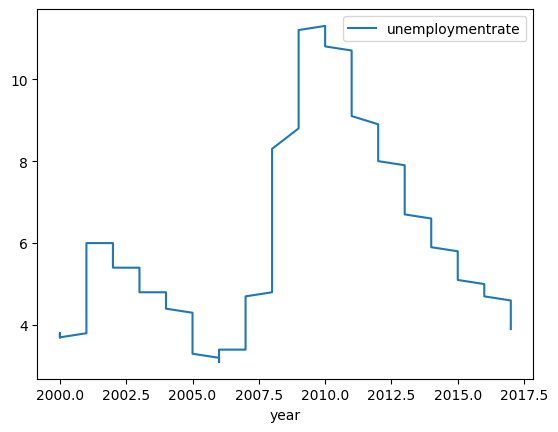

In [26]:
tiny_unemp.loc['Florida'].plot('year','unemploymentrate')

<Axes: xlabel='year'>

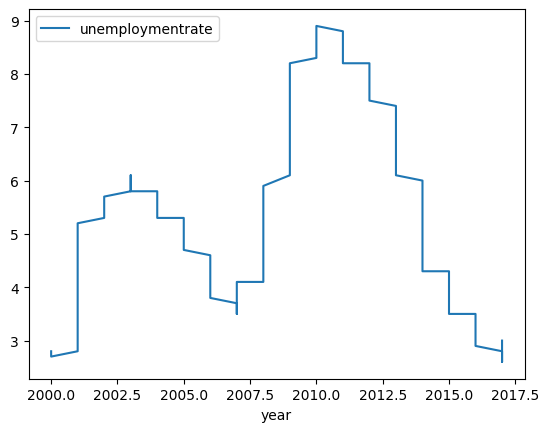

In [55]:
tiny_unemp.loc['Colorado'].plot('year','unemploymentrate')

<Axes: xlabel='year'>

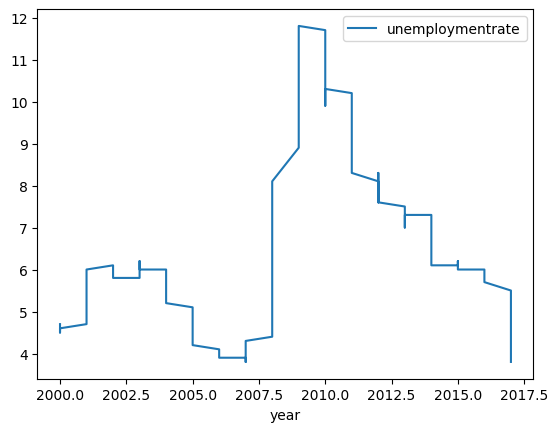

In [56]:
tiny_unemp.loc['Alabama'].plot('year','unemploymentrate')

<Axes: xlabel='year'>

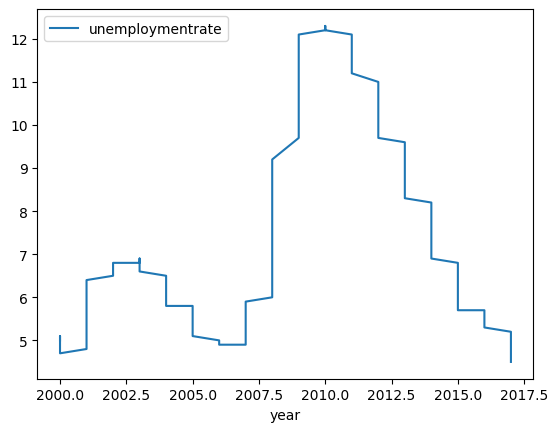

In [57]:
tiny_unemp.loc['California'].plot('year','unemploymentrate')

<Axes: xlabel='year'>

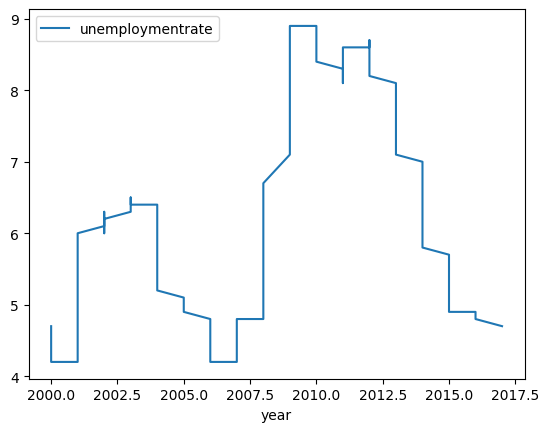

In [58]:
tiny_unemp.loc['New York'].plot('year','unemploymentrate')

In [54]:
t = pd.DataFrame(tiny_unemp.index)
t.head(1400)
#color, ala, florida, cali, ny

,0
0,"(Colorado, 2000-01-01 00:00:00)"
1,"(Colorado, 2000-02-01 00:00:00)"
2,"(Colorado, 2000-03-01 00:00:00)"
3,"(Colorado, 2000-04-01 00:00:00)"
4,"(Colorado, 2000-05-01 00:00:00)"
...,...
1075,"(Florida, 2017-08-01 00:00:00)"
1076,"(Florida, 2017-09-01 00:00:00)"
1077,"(Florida, 2017-10-01 00:00:00)"
1078,"(Florida, 2017-11-01 00:00:00)"


## Exercise 2
In this question, we're going to look at data on daily Covid cases in British Columbia from the [COVID-19 Canada Open Data Working Group](https://github.com/ccodwg/Covid19Canada). This data is broken down into five health regions:
- Fraser Health (Fraser)
- Interior Health (Interior)
- Northern Health (Northern)
- Vancouver Coastal Health (Vancouver Coastal)
- Vancouver Island Health Authority (Island)

You can see the geography of these regions below (Image from gov.bc.ca)

<img src = "https://www2.gov.bc.ca/assets/gov/health/managing-your-health/mental-health-substance-use/find-services-map-large.jpg"/>

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [65]:
# Dowlonad the Data -- don't edit this cell
bc = pd.read_csv("/content/drive/MyDrive/VSP/covid_cases_bc.csv")
bc.head()

,date_report,Fraser,Interior,Island,Northern,Vancouver Coastal
0,2021-01-01,0.000000,0.000000,0.000000,0.000000,0.000000
1,2021-01-02,25.701861,24.589675,9.101332,33.213897,24.191511
2,2021-01-03,45.464436,9.935222,10.519722,39.252788,26.815675
3,2021-01-04,21.129137,7.203036,6.500952,17.110190,21.813363
4,2021-01-05,0.000000,0.000000,0.000000,0.000000,0.000000


## Exercise 2a -- Checking the Data
`cases_bc` contains daily reported covid cases per hundred thousand people in BC for the year 2021. The data is broken down by health region. Before working with the data, you should learn how its structured and check it for potential errors. Answer the following questions in the first markdown cell below.
1. What is an observation (or row) in the dataset?
2. What is the index? Could we turn one of our variables into an index? Which one?
3. Does it make sense for any of the values in the table to be negative? Why or why not?

Now complete the following steps:
- Make it so the date is our index and check whether it is a `DateTimeIndex`. Afterwards, display `cases_bc` by making it the last line of the cell below.
- In the second cell, call `.dropna()` on cases_bc.
- In the third cell, us `.any()` and comparison operators **applied to `cases_bc`** to display all dates on which at least one of the health regions has a negative value. Call this DataFrame `neg_values`. Display `neg_values` by making it the last line of the cell. (**Hint**: Observe what happens when you use a comparison operator on a DataFrame. You can use the output to easily form an index for your DataFrame.)
- If any dates had a negative values, use comparison operators to set all negative values in `cases_bc` to `NaN`.


Answer the following Questions in the second Markdown cell.

4. Did dropping missing value change the DataFrame at all?
5. Did you find any negative values? If so, they have been turned into `NaN` values and will not be used in future analysis. What would be a possible alternative to this approach?


### Response to Exercise 2a Questions 1-3

1.   An observation in ```bc``` is each day's respective reported cases per health authority in British Columbia, Canada.
2.   The index is just the pre-coded 0-index numbers for the comnputer but we can make each date an index for easy comparison between each health authority.
3.   Values should NOT be negative because it is recording cases per hundred thousand people and accelerating, by which number of cases would not go negative if it reaches any original 'break-even', 0-case scenario.

In [66]:
# Exercise 2a -- Step 1
bc.set_index(['date_report'], inplace=True)

In [70]:
type(bc.index)
#bc.index is NOT in DateTime.

pandas.core.indexes.base.Index

In [71]:
bc

,Fraser,Interior,Island,Northern,Vancouver Coastal
date_report,,,,,
2021-01-01,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-02,25.701861,24.589675,9.101332,33.213897,24.191511
2021-01-03,45.464436,9.935222,10.519722,39.252788,26.815675
2021-01-04,21.129137,7.203036,6.500952,17.110190,21.813363
2021-01-05,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2021-12-27,42.153154,36.387752,24.585417,17.781177,28.865804
2021-12-28,41.995474,33.282995,33.686749,13.755250,32.966060
2021-12-29,83.623027,46.447164,36.523528,33.213897,46.824926


In [73]:
# Exercise 2a -- Step 2
dropped = bc.dropna()
dropped #drops ZERO rows.

,Fraser,Interior,Island,Northern,Vancouver Coastal
date_report,,,,,
2021-01-01,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-02,25.701861,24.589675,9.101332,33.213897,24.191511
2021-01-03,45.464436,9.935222,10.519722,39.252788,26.815675
2021-01-04,21.129137,7.203036,6.500952,17.110190,21.813363
2021-01-05,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2021-12-27,42.153154,36.387752,24.585417,17.781177,28.865804
2021-12-28,41.995474,33.282995,33.686749,13.755250,32.966060
2021-12-29,83.623027,46.447164,36.523528,33.213897,46.824926


In [116]:
# Exercise 2a -- Step 3
import numpy as np

neg_values = dropped<0
neg_dates = neg_values.any(axis=1)
bc = bc.where(bc>=0,np.nan)

In [119]:
(bc<0).any() #checks if any MORE negative values. Earlier Northern Vancouver and Coastal were negatives.

Fraser               False
Interior             False
Island               False
Northern             False
Vancouver Coastal    False
dtype: bool

In [115]:
neg_values

,Fraser,Interior,Island,Northern,Vancouver Coastal
date_report,,,,,
2021-01-01,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-02,25.701861,24.589675,9.101332,33.213897,24.191511
2021-01-03,45.464436,9.935222,10.519722,39.252788,26.815675
2021-01-04,21.129137,7.203036,6.500952,17.110190,21.813363
2021-01-05,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2021-12-27,42.153154,36.387752,24.585417,17.781177,28.865804
2021-12-28,41.995474,33.282995,33.686749,13.755250,32.966060
2021-12-29,83.623027,46.447164,36.523528,33.213897,46.824926


In [91]:
# Exercise 2a -- Step 4
neg_values[neg_values < 0] = 'NaN'

In [93]:
(neg_values<0).any() #since replaced neg values with NaN.

TypeError: '<' not supported between instances of 'str' and 'int'

### Response to Exercise 2a 4-5

1.   Dropping missing values didn't change the DateFrame at all because missing values were taken as negatives or also prevalent in another column, by which dropping one could drop the entire date entry. Proven below with the boolean and descriptive stats.
2.   There were negative values in Northern Vancouver and Coastal, by which a possible alternative could be to count instances of NaN dates and see correlations if higher-reported numbers by ones available in the same day are contrastingly higher than other dates for a specific region – analysing for information asymmetry or the height of COVID-19 for low reporting but high number of cases.

In [100]:
dropped.count()
bc.count()

dropped.mean() == bc.mean()

Fraser               True
Interior             True
Island               True
Northern             True
Vancouver Coastal    True
dtype: bool

## Exercise 2b -- Aggregations
Using aggregators with the axis argument, complete the following steps:
1. At each date, find the minimum number of cases per 100,000 across health regions. Print the top 3 rows of the resulting series.
2. For each health region, what was the median number of daily cases per 100,000 in 2021. Print the resulting series. (**Hint:** Think about how long should this series be.)
3. What the maximum number of daily cases per 100,000 across all health regions? Which health region did this maximum occur in? What day was the maximum attained?

**Hint:** For the last step, you might need to aggregate twice. You may also want to use the aggregator `.idxmax()` which returns the index of the maximum value.

In [126]:
# Exercise 2b -- Step 1
bc.groupby(level=0).min().head(3)

,Fraser,Interior,Island,Northern,Vancouver Coastal
date_report,,,,,
2021-01-01,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-02,25.701861,24.589675,9.101332,33.213897,24.191511
2021-01-03,45.464436,9.935222,10.519722,39.252788,26.815675


In [128]:
# Exercise 2b -- Step 2
bc.groupby(level=0).median()

,Fraser,Interior,Island,Northern,Vancouver Coastal
date_report,,,,,
2021-01-01,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-02,25.701861,24.589675,9.101332,33.213897,24.191511
2021-01-03,45.464436,9.935222,10.519722,39.252788,26.815675
2021-01-04,21.129137,7.203036,6.500952,17.110190,21.813363
2021-01-05,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2021-12-27,42.153154,36.387752,24.585417,17.781177,28.865804
2021-12-28,41.995474,33.282995,33.686749,13.755250,32.966060
2021-12-29,83.623027,46.447164,36.523528,33.213897,46.824926




> The maximum number of daily cases can be shown with ```bc.groupby(level=0).max()```. Days of maximums are shown below and the largewt maximum is Northern BC in October.





In [133]:
bc.groupby(level=0).max().idxmax()

Fraser               2021-12-30
Interior             2021-07-09
Island               2021-12-30
Northern             2021-10-18
Vancouver Coastal    2021-12-30
dtype: object

In [140]:
bc['Vancouver Coastal'].max()

80.1190058354846

In [141]:
bc['Northern'].max()

136.2105291410014

In [142]:
bc['Island'].max()

54.371594387905866

In [143]:
bc['Interior'].max()

104.07145411914318

In [146]:
bc['Fraser'].max()

121.88673731437108

## Exercise 2c -- Classifying Variance
Averages and medians communicate some notion of the statistical center of data. Similarly, the sample variance of data gives us some sense of how dispersed the data is around that center. A low variance means the data is relatively concentrated whereas a high variance means the data is relatively dispersed. The sample variance of a column of data $x$ can be given by the following equation
$$
var(x) = \frac{1}{n-1} \sum_{i=1}^{n} \left(x_i - \bar{x}\right)^2
$$
where $n$ is the nimber of elements in $x$, $\bar{x}$ is the average of $x$, and $x_i$ is a single element in $x$. Complete the following steps:
1.  The method DataFrame and Series method `.var()` will automatically calculate the variance of each column or row in a DataFrame. Use `.var()` to calculate the variance in the daily cases per 100,000 for each health region in 2021. Name this DataFrame `hr_var`.
2. Currently,  `hr_var` has a single column indexed by the integer 0. Rename this column so it is called "s_var".
3. Using a list comprehension, create a new column in `hr_var` called "classification" which is equal to
    - "High" if the variance for a health region is strictly greater than 300,  
    - "Medium" if the variance for a health region is strictly greater than 150 and less than or equal to 300
    - "Low" if the variance for a health region is less than or equal to 150.
    
4. Display the resulting DataFrame by having `hr_var` as your last line in the cell.
5. In the second cell, use `cases_bc`, indexing, and `.plot()` to plot the daily cases per 100,000 for the Northern and Island health regions.

Finally, in the Markdown cell below **answer the following question**. What are the classifications for the Northern and Island regions. What features of the two lines you plotted reflect these classifications?


**Hint:** For step 3, you will want to use a nested if else statements within the list comprehension.

In [159]:
# Exercise 2c -- Steps 1-4
hr_var = pd.DataFrame(bc.var())
hr_var.columns = ['s_var']
hr_var

hr_var.insert(1, "classification", ["High" if i > 300 else "Medium" if i > 150 else "Low" for i in hr_var['s_var']])
hr_var

,s_var,classification
Fraser,325.974643,High
Interior,248.630355,Medium
Island,70.464125,Low
Northern,492.035072,High
Vancouver Coastal,193.452989,Medium


In [176]:
bc

,Fraser,Interior,Island,Northern,Vancouver Coastal
date_report,,,,,
2021-01-01,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-02,25.701861,24.589675,9.101332,33.213897,24.191511
2021-01-03,45.464436,9.935222,10.519722,39.252788,26.815675
2021-01-04,21.129137,7.203036,6.500952,17.110190,21.813363
2021-01-05,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2021-12-27,42.153154,36.387752,24.585417,17.781177,28.865804
2021-12-28,41.995474,33.282995,33.686749,13.755250,32.966060
2021-12-29,83.623027,46.447164,36.523528,33.213897,46.824926


<Axes: xlabel='date_report'>

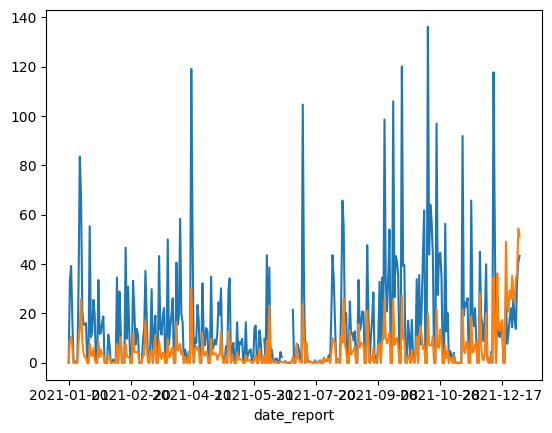

In [178]:
# Exercise 2c -- Step 5
bc["Northern"].plot() #Northern
bc["Island"].plot() #Island

### Response to Exercise 2c
Island records a low classification of 70.464125 s_var while Northern has a High classification with 492.035072. Island's line is evidently lower in number of cases compared to Northern, with smaller spikes albeit on correlating dates.

## Exerice 2d -- More Classifying & `.applymap()`
Now, we want to determine whether the cases per 100,000 on a given day was "High" ($> 10$), "Low"($\leq 10$ and $>0$), or "None" ($=0$) for each region-day. To do this, complete the following steps:
1. Define a function called `classify_cases` that takes a **single number** and returns a "High", "Low" or "None" according to the criteria aboce
2. `.applymap()` takes a function of a single value and applies that function to each cell in a DataFrame  individuall. Using `classify_cases` and `.applymap`, create a DataFrame that has a classification for each region-day. Call this DataFrame `cases_bins`.
3. Print the top 5 rows of that DataFratme.

In [186]:
# Exercise 2d code
def classify_cases(x):
  if x > 10:
    return "High"
  elif x <= 10 and x > 0:
    return "Low"
  else:
    return "None"

cases_bins = bc.applymap(classify_cases)
cases_bins.head(5)

,Fraser,Interior,Island,Northern,Vancouver Coastal
date_report,,,,,
2021-01-01,None,None,None,None,None
2021-01-02,High,High,Low,High,High
2021-01-03,High,Low,High,High,High
2021-01-04,High,Low,Low,High,High
2021-01-05,None,None,None,None,None


### Exercise 2e -- Classification Count
Next, we want to count how many days of each type ("High", "Low", and "None") each helth region had on 2021. Complete the following steps:
1. Using `pd.value_counts` and `.apply()`, create DataFrame called `class_counts` where the row indices are the three classes and the columns are health regions.
2. Using the DataFrame method `.barh()`, create a horizontal bar plot where there are five groups of three bars.

**Hint:** You may have to use `.T` to get the right bar chart.

In [192]:
# Exercise 2e code
class_counts = pd.DataFrame(cases_bins.apply(pd.value_counts))
class_counts

,Fraser,Interior,Island,Northern,Vancouver Coastal
High,171,144,58,171,117
Low,84,108,194,75,137
None,110,113,113,119,111


<Axes: >

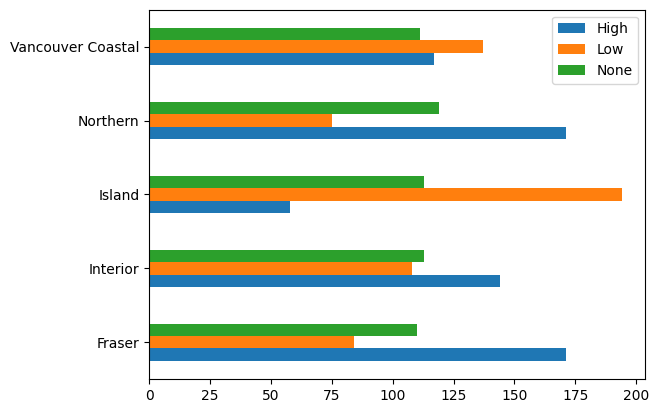

In [195]:
class_counts.T.plot.barh()

### Exercise 2f -- Choose Your Health Region
Choose one of the five health regions. Complete the following steps to find the average number of cases per 100,000 when case loads are "High" and when case loads are "Low".
1. Using `pd.concat()` `cases_bc`, and `cases_bin`, create a DataFrame with two columns called `my_health_region`. The first column should be titled "cases" and include the number of cases per 100,000 in your chosen health region for each day. The second column should be titled "class" and include the classification for that health region in each day.
2. Using `.groupby()` and an aggregator, find the average number of cases per 100,000 when case loads are "High" and when case loads are "Low".

In [202]:
# Exercise 2f code
my_health_region = pd.concat([bc['Northern'], cases_bins['Northern']], axis=1)
my_health_region.columns = ['Cases', 'Class']
my_health_region

my_health_region.groupby('Class').mean()

,Cases
Class,
High,31.457950
Low,4.383787
None,0.000000
